In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore


In [2]:
#panggil file dataset

filecsv = 'data_pkh.csv'
teks = pd.read_csv(filecsv, header = 0, delimiter = ',', encoding = 'utf-8')
df = pd.DataFrame(teks)
np.set_printoptions(threshold=np.inf)
df

,No.,Usia,Penghasilan,Pekerjaan,Status Perkawinan,Jumlah Tanggungan,Pendidikan,Status Rumah,L/P,Ibu Hamil/Menyusui,Balita,Anak Prasekolah,Anak Sekolah,Lansia,Penyandang Disabilitas,Status Kelayakan
0,1,49,800000,PEDAGANG,MENIKAH,3,SD,MILIK ORANG TUA,L,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Layak
1,2,42,3500000,KARYAWAN SWASTA,MENIKAH,3,SMA,KONTRAK,L,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak Layak
2,3,71,0,TIDAK ADA,CERAI MATI,1,SD,MILIK SENDIRI,P,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Layak
3,4,45,1000000,PEDAGANG,MENIKAH,3,SMP,MILIK SENDIRI,L,Ya,Ya,Tidak,Ya,Tidak,Tidak,Layak
4,5,74,0,TIDAK ADA,CERAI MATI,1,SD,MILIK SENDIRI,P,Ya,Ya,Tidak,Tidak,Ya,Ya,Layak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,418,74,1000000,PEDAGANG,CERAI MATI,2,SMP,MILIK SENDIRI,L,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak Layak
418,419,45,3500000,KARYAWAN SWASTA,MENIKAH,3,SD,MILIK ORANG TUA,L,Ya,Tidak,Ya,Tidak,Ya,Tidak,Tidak Layak
419,420,77,1200000,PETERNAK,CERAI MATI,3,S1,KONTRAK,P,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak Layak
420,421,36,1500000,PEDAGANG,MENIKAH,2,SMA,BEBAS SEWA,L,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak Layak


In [3]:
#Memisahkan atribut kategori dan atribut target

xTarget = df.drop(["No.","Status Kelayakan"], axis=1)
print(xTarget)

     Usia  Penghasilan        Pekerjaan Status Perkawinan  Jumlah Tanggungan  \
0      49       800000         PEDAGANG           MENIKAH                  3   
1      42      3500000  KARYAWAN SWASTA           MENIKAH                  3   
2      71            0        TIDAK ADA        CERAI MATI                  1   
3      45      1000000         PEDAGANG           MENIKAH                  3   
4      74            0        TIDAK ADA        CERAI MATI                  1   
..    ...          ...              ...               ...                ...   
417    74      1000000         PEDAGANG        CERAI MATI                  2   
418    45      3500000  KARYAWAN SWASTA           MENIKAH                  3   
419    77      1200000         PETERNAK        CERAI MATI                  3   
420    36      1500000         PEDAGANG           MENIKAH                  2   
421    56      3500000  KARYAWAN SWASTA           MENIKAH                  3   

    Pendidikan     Status Rumah L/P Ibu

In [4]:
yTarget = df['Status Kelayakan']
print(yTarget)

0            Layak
1      Tidak Layak
2            Layak
3            Layak
4            Layak
          ...     
417    Tidak Layak
418    Tidak Layak
419    Tidak Layak
420    Tidak Layak
421    Tidak Layak
Name: Status Kelayakan, Length: 422, dtype: object


In [5]:
#Mengecek berapa banyak nilai null 

xTarget.isna().sum()

Usia                      0
Penghasilan               0
Pekerjaan                 0
Status Perkawinan         0
Jumlah Tanggungan         0
Pendidikan                0
Status Rumah              0
L/P                       0
Ibu Hamil/Menyusui        0
Balita                    0
Anak Prasekolah           0
Anak Sekolah              0
Lansia                    0
Penyandang Disabilitas    0
dtype: int64

In [6]:
xTarget.dtypes

Usia                       int64
Penghasilan                int64
Pekerjaan                 object
Status Perkawinan         object
Jumlah Tanggungan          int64
Pendidikan                object
Status Rumah              object
L/P                       object
Ibu Hamil/Menyusui        object
Balita                    object
Anak Prasekolah           object
Anak Sekolah              object
Lansia                    object
Penyandang Disabilitas    object
dtype: object

In [7]:
# Pisahkan kolom numerik dan kategorikal
numerik = xTarget.select_dtypes(include=['int64', 'float64'])
kategorikal = xTarget.select_dtypes(include='object')

# OneHot Encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_kategorikal_encoded = ohe.fit_transform(kategorikal)

# Gabungkan numerik + kategorikal
X_encoded = np.hstack([numerik.values, X_kategorikal_encoded])

# Simpan nama kolom hasil encoding
encoded_columns = list(numerik.columns) + list(ohe.get_feature_names_out(kategorikal.columns))
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Format nilai float menjadi angka tanpa koma jika integer
formatted_df = X_encoded_df.applymap(lambda x: int(x) if isinstance(x, (int, float)) and x.is_integer() else round(x, 2))

# Tampilkan sebagai tabel
print(formatted_df.to_string(index=False))

 Usia  Penghasilan  Jumlah Tanggungan  Pekerjaan_ASISTEN RUMAH TANGGA  Pekerjaan_BERTANI  Pekerjaan_BURUH  Pekerjaan_KARYAWAN SWASTA  Pekerjaan_PEDAGANG  Pekerjaan_PEGAWAI  Pekerjaan_PETERNAK  Pekerjaan_TIDAK ADA  Pekerjaan_WIRASWASTA  Status Perkawinan_BELUM MENIKAH  Status Perkawinan_CERAI HIDUP  Status Perkawinan_CERAI MATI  Status Perkawinan_MENIKAH  Pendidikan_S1  Pendidikan_SD  Pendidikan_SMA  Pendidikan_SMP  Status Rumah_BEBAS SEWA  Status Rumah_KONTRAK  Status Rumah_MENUMPANG  Status Rumah_MILIK ORANG TUA  Status Rumah_MILIK SENDIRI  L/P_L  L/P_P  Ibu Hamil/Menyusui_Tidak  Ibu Hamil/Menyusui_Ya  Balita_Tidak  Balita_Ya  Anak Prasekolah_Tidak  Anak Prasekolah_Ya  Anak Sekolah_Tidak  Anak Sekolah_Ya  Lansia_Tidak  Lansia_Ya  Penyandang Disabilitas_Tidak  Penyandang Disabilitas_Ya
   49       800000                  3                               0                  0                0                          0                   1                  0                   0            

C:\Users\Darmdi\AppData\Local\Temp\ipykernel_4144\1986816147.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = X_encoded_df.applymap(lambda x: int(x) if isinstance(x, (int, float)) and x.is_integer() else round(x, 2))


In [8]:
lb = LabelBinarizer()
y_encoded = lb.fit_transform(yTarget)
print(y_encoded)
X_encoded_df['target'] = y_encoded

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]


In [9]:
numerik_features = numerik.columns.tolist()
z_scores = np.abs(zscore(X_encoded_df[numerik_features]))
outlier_threshold = 3
filtered_entries = (z_scores < outlier_threshold).all(axis=1)

X_no_outlier = X_encoded_df[filtered_entries].drop(columns=['target'])
y_no_outlier = y_encoded[filtered_entries]

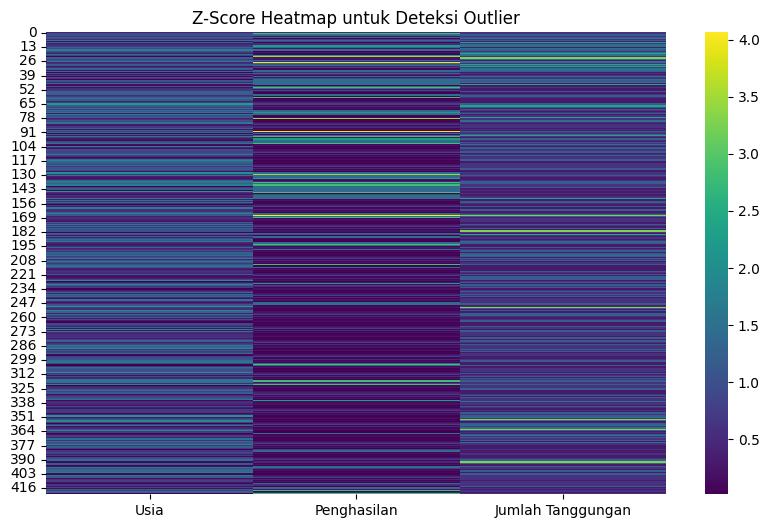

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(z_scores, cmap='viridis', cbar=True)
plt.title('Z-Score Heatmap untuk Deteksi Outlier')
plt.show()

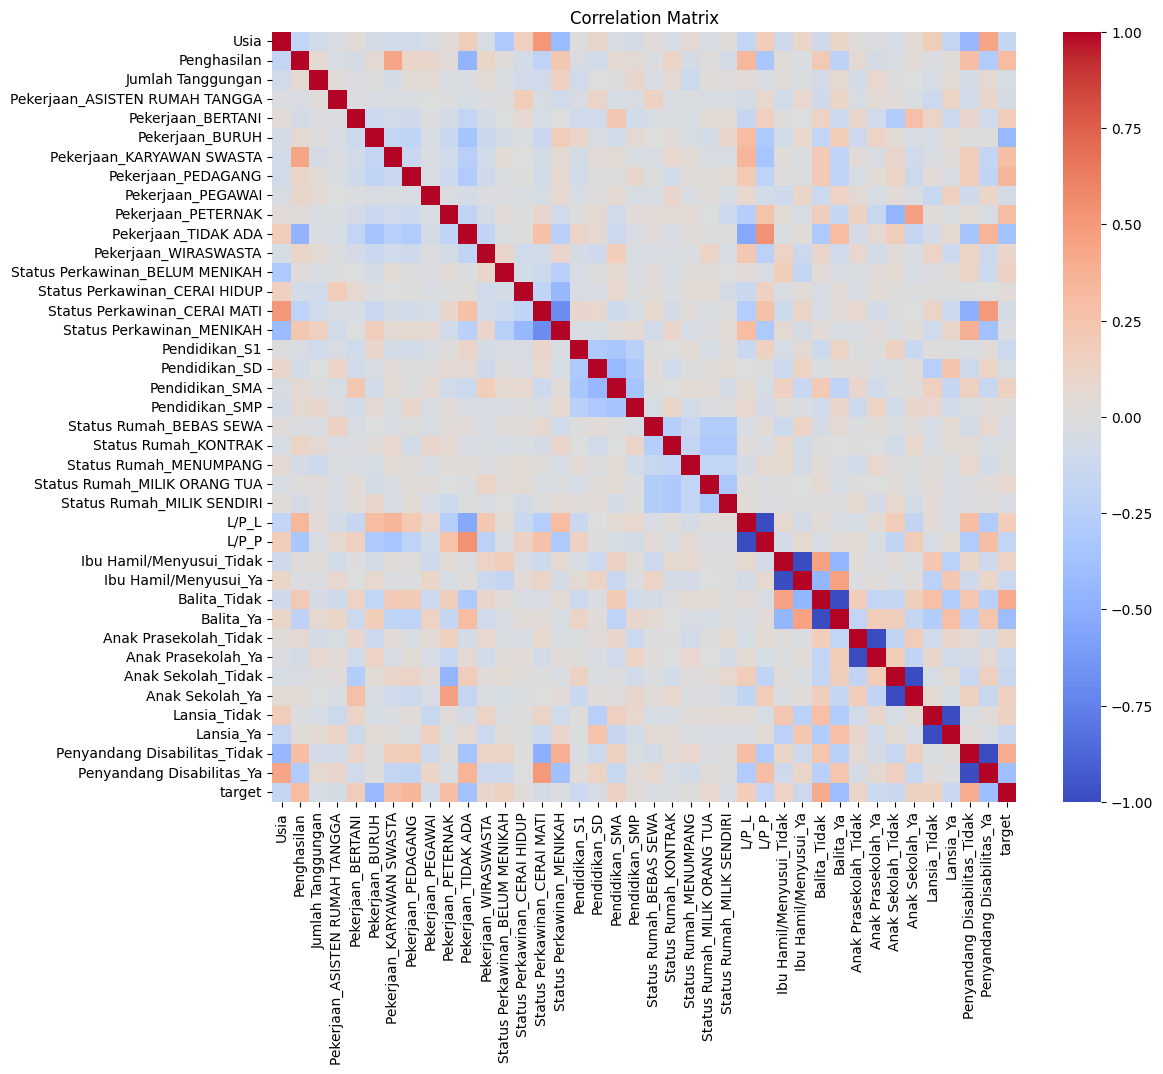

In [11]:
corr_df = X_no_outlier.copy()
corr_df['target'] = y_no_outlier
corr = corr_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
corr_target = corr['target'].abs().sort_values(ascending=False)
selected_features = corr_target[corr_target > 0.05].index.drop('target')
print("Fitur terpilih:", selected_features.tolist())
print(selected_features.value_counts)

Fitur terpilih: ['Pekerjaan_BURUH', 'Balita_Tidak', 'Balita_Ya', 'Penyandang Disabilitas_Tidak', 'Penyandang Disabilitas_Ya', 'Pekerjaan_TIDAK ADA', 'Pekerjaan_PEDAGANG', 'Penghasilan', 'Pekerjaan_KARYAWAN SWASTA', 'Pekerjaan_PETERNAK', 'Pekerjaan_BERTANI', 'L/P_P', 'L/P_L', 'Usia', 'Lansia_Tidak', 'Lansia_Ya', 'Pendidikan_SMA', 'Status Perkawinan_BELUM MENIKAH', 'Anak Sekolah_Ya', 'Anak Sekolah_Tidak', 'Pendidikan_S1', 'Ibu Hamil/Menyusui_Ya', 'Ibu Hamil/Menyusui_Tidak', 'Anak Prasekolah_Tidak', 'Anak Prasekolah_Ya', 'Pekerjaan_WIRASWASTA', 'Status Rumah_MILIK ORANG TUA', 'Pekerjaan_PEGAWAI', 'Pekerjaan_ASISTEN RUMAH TANGGA', 'Status Perkawinan_CERAI MATI']
<bound method IndexOpsMixin.value_counts of Index(['Pekerjaan_BURUH', 'Balita_Tidak', 'Balita_Ya',
       'Penyandang Disabilitas_Tidak', 'Penyandang Disabilitas_Ya',
       'Pekerjaan_TIDAK ADA', 'Pekerjaan_PEDAGANG', 'Penghasilan',
       'Pekerjaan_KARYAWAN SWASTA', 'Pekerjaan_PETERNAK', 'Pekerjaan_BERTANI',
       'L/P_P', 'L/P

In [13]:
# Ambil fitur terpilih
X_selected = X_no_outlier[selected_features]

In [14]:
# 9. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

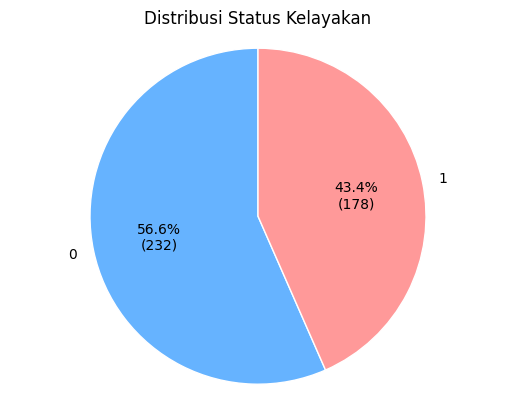

In [15]:
# Data dari unique classes dan counts
classes, counts = np.unique(y_no_outlier, return_counts=True)

# Fungsi untuk tampilkan persen + jumlah
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)
# Pie Chart
plt.pie(
    counts, 
    labels=classes, 
    autopct=lambda pct: func(pct, counts), 
    colors=['#66b3ff', '#ff9999'], 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribusi Status Kelayakan')
plt.axis('equal')  # Biar pie chart jadi lingkaran sempurna
plt.show()

In [16]:
# 10. Balancing dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_no_outlier)
print(y_balanced)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


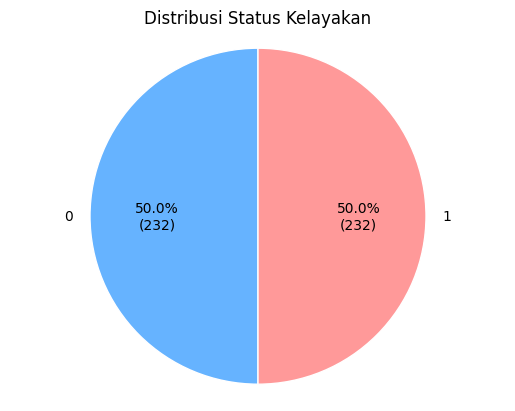

In [17]:
# Data dari unique classes dan counts
classes, counts = np.unique(y_balanced, return_counts=True)

# Fungsi untuk tampilkan persen + jumlah
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Pie Chart
plt.pie(
    counts, 
    labels=classes, 
    autopct=lambda pct: func(pct, counts), 
    colors=['#66b3ff', '#ff9999'], 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Distribusi Status Kelayakan')
plt.axis('equal')  # Biar pie chart jadi lingkaran sempurna
plt.show()

In [18]:
# 11. Train-Test Split 20:80
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced,
    train_size=0.2,
    random_state=42,
    stratify=y_balanced)

In [19]:
# 12. Modelling dengan MLP
model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [20]:
# 13. Evaluasi Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8790322580645161
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       186
           1       0.87      0.89      0.88       186

    accuracy                           0.88       372
   macro avg       0.88      0.88      0.88       372
weighted avg       0.88      0.88      0.88       372



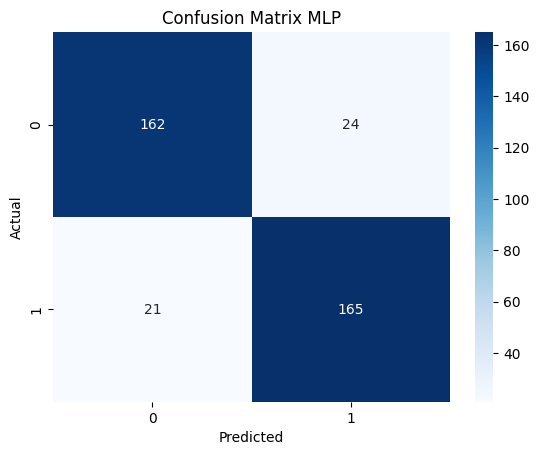

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# 11. Train-Test Split 20:80
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced)

In [23]:
# 12. Modelling dengan MLP
model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [24]:
# 13. Evaluasi Model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.956989247311828
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.96      0.96      0.96        46

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



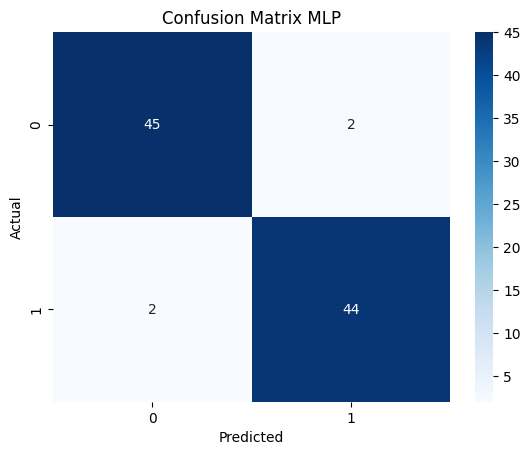

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# print("Shape bobot input → hidden1:", model.coefs_[0].shape)  # (30, 100)
# print("Shape bobot hidden1 → hidden2:", model.coefs_[1].shape)  # (100, 50)
# print("Shape bobot hidden2 → output:", model.coefs_[2].shape)  # (50, 1)

In [27]:
# print("Bobot dari input ke hidden layer 1:")
# print(model.coefs_[0])  
# print("\nBias ke hidden layer 1:")
# print(model.intercepts_[0])  

In [28]:
# print("Bobot dari hidden layer 1 ke hidden layer 2:")
# print(model.coefs_[1])  
# print("\nBias ke hidden layer 2:")
# print(model.intercepts_[1])  

In [29]:
# print("Bobot dari hidden layer 2 ke output:")
# print(model.coefs_[2])
# print("Bias output layer:")
# print(model.intercepts_[2])

In [30]:
# import numpy as np

# def relu(z):
#     return np.maximum(0, z)

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# def manual_predict(x_scaled, model):
#     """
#     Melakukan forward pass secara manual pada model MLPClassifier.

#     Parameter:
#     - x_scaled: array 1D input data yang sudah di-scale (StandardScaler)
#     - model: model MLPClassifier yang sudah dilatih

#     Output:
#     - prob: probabilitas hasil sigmoid (0-1)
#     - pred: string 'LAYAK' atau 'TIDAK LAYAK'
#     """
#     # Ambil bobot dan bias dari model
#     w1 = model.coefs_[0]
#     b1 = model.intercepts_[0]
    
#     w2 = model.coefs_[1]
#     b2 = model.intercepts_[1]
    
#     w3 = model.coefs_[2]
#     b3 = model.intercepts_[2]

#     # Forward pass
#     z1 = np.dot(x_scaled, w1) + b1
#     a1 = relu(z1)

#     z2 = np.dot(a1, w2) + b2
#     a2 = relu(z2)

#     z3 = np.dot(a2, w3) + b3
#     y_hat = sigmoid(z3)

#     # Hasil
#     prob = y_hat[0]
#     pred = "LAYAK" if prob > 0.5 else "TIDAK LAYAK"
#     return prob, pred

In [31]:
# x_input = np.array([-0.49236596, 0.67372154, -0.67372154, 0.8, -0.8, -0.7200823,
#                     -0.40183714, 0.65212921, -0.35549068, -0.27589035, -0.2548236, -0.98067451,
#                     0.98067451, -0.15803218, 0.57171745, -0.57171745, 1.42724806, -0.20798317,
#                     -0.40592207, 0.40592207, -0.48086509, -0.84162541, 0.84162541, 0.55669036,
#                     -0.55669036, 3.69362385, 1.77240349, -0.08585457, -0.070014, -0.56420561])
# # Hitung manual prediksi
# probabilitas, prediksi = manual_predict(x_input, model)
# print(f"Hasil Data ke-1: Probabilitas Layak = {probabilitas:.4f}, Prediksi = {prediksi}")

In [32]:
# y_pred_labels = [1 if p > 0.5 else 0 for p in y_proba]
# for i, (proba, label) in enumerate(zip(y_proba, y_pred_labels)):
#     print(f"Data ke-{i+1}: Probabilitas Layak = {proba:.4f}, Prediksi = {'LAYAK' if label == 1 else 'TIDAK LAYAK'}")

In [33]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selected_features.tolist(), "selected_features.pkl")
joblib.dump(kategorikal.columns.tolist(), 'categorical_features.pkl')
joblib.dump(numerik.columns.tolist(), 'numerical_features.pkl')
joblib.dump(ohe, 'ohe.pkl')

['ohe.pkl']